In [14]:
import numpy as np
# import pandas as pd
# import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import binom, beta, uniform, gamma, poisson,nbinom

In [15]:
yA=np.array([12,9,12,14,13,13,15,8,15,6])
yB=np.array([11,11,10,9,9,8,7,10,6,8,8,9,7])
thetaA=gamma(a = 120, scale=1/10)
thetaB=gamma(a = 12, scale=1/1)
size=10000

### a) independent thetaA and thetaB

In [26]:
thetaA_yA = gamma.rvs(a=120+sum(yA), scale=1/(10+len(yA)), size=size)
thetaB_yB = gamma.rvs(a=12+sum(yB), scale=1/(1+len(yB)), size=size)
YtA = nbinom.rvs(n=120+sum(yA),p=(10+len(yA))/(10+len(yA)+1), size=size)
YtB = nbinom.rvs(n=12+sum(yB),p=(1+len(yB))/(1+1+len(yB)), size=size)

YtA1 = poisson.rvs(thetaA_yA, size=size)
YtB1 = poisson.rvs(thetaB_yB, size=size)

print(np.sum(thetaA_yA>thetaB_yB)/size)
print(np.sum(YtA>YtB)/size)
print(np.sum(YtA1>YtB1)/size)

0.9964
0.693
0.6985


In [34]:
sum(yB)

113

### b) various n0 for thetaB

In [31]:
n0ar = np.arange(1, 250)
prob = np.zeros(len(n0ar))
prob_y = np.zeros(len(n0ar))
prob_y1 = np.zeros(len(n0ar))
for i, n0 in enumerate(n0ar):
    thetaA_yA = gamma.rvs(a=120+sum(yA), scale=1/(10+len(yA)), size=size)
    thetaB_yB = gamma.rvs(a=12*n0+sum(yB), scale=1/(1*n0+len(yB)), size=size)
    YtA = nbinom.rvs(n=120+sum(yA),p=(10+len(yA))/(10+len(yA)+1), size=size)
    YtB = nbinom.rvs(n=12*n0+sum(yB),p=(1*n0+len(yB))/(1*n0+1+len(yB)), size=size)
    YtA1 = poisson.rvs(thetaA_yA, size=size)
    YtB1 = poisson.rvs(thetaB_yB, size=size)
    prob[i] = np.sum(thetaA_yA>thetaB_yB)/size
    prob_y[i] = np.sum(YtA>YtB)/size
    prob_y1[i] = np.sum(YtA1>YtB1)/size

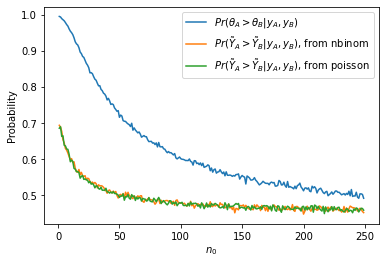

In [32]:
plt.figure(figsize = (6,4))
plt.plot(n0ar, prob, label = '$Pr(\\theta_A > \\theta_B | y_A, y_B)$')
plt.plot(n0ar, prob_y, label = '$Pr(\\tilde{Y}_A > \\tilde{Y}_B | y_A, y_B)$, from nbinom')
plt.plot(n0ar, prob_y1, label = '$Pr(\\tilde{Y}_A > \\tilde{Y}_B | y_A, y_B)$, from poisson')
plt.xlabel('$n_0$')
plt.ylabel('Probability')
plt.legend()
plt.savefig('/nfs/scistore12/gaspgrp/emaksimo/courses/CompBayesStat/plots/Ex3_3_Fig1.png')

In [30]:
prob_y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.